# Desafio do Spaceship Titanic

## Importando bibliotecas

In [1]:
import xgboost as xgb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Extraindo os dataFrames

In [2]:
train_data = pd.read_csv('train.csv') #Será utilizado para treinar o modelo
test_data = pd.read_csv('test.csv') #Será utilizado para testar o modelo treinado

In [3]:
train_data.shape, test_data.shape

((8693, 14), (4277, 13))

In [4]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
test_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## Primeiro, irei mudar o valor de 'Transported', alterando para números

In [6]:
# Substituir True por 1 e False por 0 na coluna 'Transported'
train_data['Transported'] = train_data['Transported'].astype(int)

## Aqui irei setar o PassengerId como o index dos DataFrames

In [7]:
train_data.set_index('PassengerId', inplace=True)
test_data.set_index('PassengerId', inplace=True)

## Vamos verificar os dados nulos

In [8]:
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
test_data.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## Vamos concatenar os DataFrames e substituir os dados nulos pela média ou moda 

In [10]:
data = pd.concat([train_data, test_data], sort=True)

In [11]:
data

,Age,Cabin,CryoSleep,Destination,FoodCourt,HomePlanet,Name,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck
PassengerId,,,,,,,,,,,,,
0001_01,39.0,B/0/P,False,TRAPPIST-1e,0.0,Europa,Maham Ofracculy,0.0,0.0,0.0,0.0,False,0.0
0002_01,24.0,F/0/S,False,TRAPPIST-1e,9.0,Earth,Juanna Vines,109.0,25.0,549.0,1.0,False,44.0
0003_01,58.0,A/0/S,False,TRAPPIST-1e,3576.0,Europa,Altark Susent,43.0,0.0,6715.0,0.0,True,49.0
0003_02,33.0,A/0/S,False,TRAPPIST-1e,1283.0,Europa,Solam Susent,0.0,371.0,3329.0,0.0,False,193.0
0004_01,16.0,F/1/S,False,TRAPPIST-1e,70.0,Earth,Willy Santantines,303.0,151.0,565.0,1.0,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,G/1496/S,True,TRAPPIST-1e,0.0,Earth,Jeron Peter,0.0,0.0,0.0,NaN,False,0.0
9269_01,42.0,NaN,False,TRAPPIST-1e,847.0,Earth,Matty Scheron,0.0,17.0,10.0,NaN,False,144.0
9271_01,NaN,D/296/P,True,55 Cancri e,0.0,Mars,Jayrin Pore,0.0,0.0,0.0,NaN,False,0.0


In [12]:
data.isnull().sum()

Age              270
Cabin            299
CryoSleep        310
Destination      274
FoodCourt        289
HomePlanet       288
Name             294
RoomService      263
ShoppingMall     306
Spa              284
Transported     4277
VIP              296
VRDeck           268
dtype: int64

#### Aqui irei separar os dados de Cabin que vem no formato Deck/Cabin_num/Side

In [13]:
data[["Deck", "Cabin_num", "Side"]] = data["Cabin"].str.split("/", expand=True)

In [14]:
data

,Age,Cabin,CryoSleep,Destination,FoodCourt,HomePlanet,Name,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Deck,Cabin_num,Side
PassengerId,,,,,,,,,,,,,,,,
0001_01,39.0,B/0/P,False,TRAPPIST-1e,0.0,Europa,Maham Ofracculy,0.0,0.0,0.0,0.0,False,0.0,B,0,P
0002_01,24.0,F/0/S,False,TRAPPIST-1e,9.0,Earth,Juanna Vines,109.0,25.0,549.0,1.0,False,44.0,F,0,S
0003_01,58.0,A/0/S,False,TRAPPIST-1e,3576.0,Europa,Altark Susent,43.0,0.0,6715.0,0.0,True,49.0,A,0,S
0003_02,33.0,A/0/S,False,TRAPPIST-1e,1283.0,Europa,Solam Susent,0.0,371.0,3329.0,0.0,False,193.0,A,0,S
0004_01,16.0,F/1/S,False,TRAPPIST-1e,70.0,Earth,Willy Santantines,303.0,151.0,565.0,1.0,False,2.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,G/1496/S,True,TRAPPIST-1e,0.0,Earth,Jeron Peter,0.0,0.0,0.0,NaN,False,0.0,G,1496,S
9269_01,42.0,NaN,False,TRAPPIST-1e,847.0,Earth,Matty Scheron,0.0,17.0,10.0,NaN,False,144.0,NaN,NaN,NaN
9271_01,NaN,D/296/P,True,55 Cancri e,0.0,Mars,Jayrin Pore,0.0,0.0,0.0,NaN,False,0.0,D,296,P


### Removendo os colunas Cabin e Name

In [15]:
#Removendo a coluna Cabin, porque a variedade de dados categóricos é grande e irá atrapalhar mais do que ajudar
data.drop(['Cabin'], axis=1, inplace=True)
data.drop(['Name'], axis=1, inplace=True)

### Finalmente substituindo os valores nulos

In [16]:
Age_Mean = data['Age'].mean().round(0)
data['Age'].fillna(Age_Mean, inplace=True)

Mode_CryoSleep = data['CryoSleep'].mode()[0]
data['CryoSleep'].fillna(Mode_CryoSleep, inplace=True)

Mode_Destination = data['Destination'].mode()[0]
data['Destination'].fillna(Mode_Destination, inplace=True)

Mode_FoodCourt = data['FoodCourt'].mode()[0]
data['FoodCourt'].fillna(Mode_FoodCourt, inplace=True)

Mode_HomePlanet = data['HomePlanet'].mode()[0]
data['HomePlanet'].fillna(Mode_HomePlanet, inplace=True)

Mode_RoomService = data['RoomService'].mode()[0]
data['RoomService'].fillna(Mode_RoomService, inplace=True)

Mode_ShoppingMall = data['ShoppingMall'].mode()[0]
data['ShoppingMall'].fillna(Mode_ShoppingMall, inplace=True)

Mode_Spa = data['Spa'].mode()[0]
data['Spa'].fillna(Mode_Spa, inplace=True)

Mode_VIP = data['VIP'].mode()[0]
data['VIP'].fillna(Mode_VIP, inplace=True)

Mode_VRDeck = data['VRDeck'].mode()[0]
data['VRDeck'].fillna(Mode_VRDeck, inplace=True)

In [17]:
data.isnull().sum()

Age                0
CryoSleep          0
Destination        0
FoodCourt          0
HomePlanet         0
RoomService        0
ShoppingMall       0
Spa                0
Transported     4277
VIP                0
VRDeck             0
Deck             299
Cabin_num        299
Side             299
dtype: int64

In [18]:
Mode_cabinnum = data['Cabin_num'].mode()[0]
data['Cabin_num'].fillna(Mode_cabinnum, inplace=True)

In [19]:
data['Cabin_num'].isnull().sum()

0

### Como temos que deixar os valores númericos, vamos fazer isso para a nossa mais nova Feature

In [20]:
data['Cabin_num'] = data['Cabin_num'].astype(int)
data['VIP'] = data['VIP'].astype(int)
data['CryoSleep'] = data['CryoSleep'].astype(int)

In [21]:
data

,Age,CryoSleep,Destination,FoodCourt,HomePlanet,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Deck,Cabin_num,Side
PassengerId,,,,,,,,,,,,,,
0001_01,39.0,0,TRAPPIST-1e,0.0,Europa,0.0,0.0,0.0,0.0,0,0.0,B,0,P
0002_01,24.0,0,TRAPPIST-1e,9.0,Earth,109.0,25.0,549.0,1.0,0,44.0,F,0,S
0003_01,58.0,0,TRAPPIST-1e,3576.0,Europa,43.0,0.0,6715.0,0.0,1,49.0,A,0,S
0003_02,33.0,0,TRAPPIST-1e,1283.0,Europa,0.0,371.0,3329.0,0.0,0,193.0,A,0,S
0004_01,16.0,0,TRAPPIST-1e,70.0,Earth,303.0,151.0,565.0,1.0,0,2.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,1,TRAPPIST-1e,0.0,Earth,0.0,0.0,0.0,NaN,0,0.0,G,1496,S
9269_01,42.0,0,TRAPPIST-1e,847.0,Earth,0.0,17.0,10.0,NaN,0,144.0,NaN,82,NaN
9271_01,29.0,1,55 Cancri e,0.0,Mars,0.0,0.0,0.0,NaN,0,0.0,D,296,P


In [22]:
data['Side'].unique()

array(['P', 'S', nan], dtype=object)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0001_01 to 9277_01
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           12970 non-null  float64
 1   CryoSleep     12970 non-null  int32  
 2   Destination   12970 non-null  object 
 3   FoodCourt     12970 non-null  float64
 4   HomePlanet    12970 non-null  object 
 5   RoomService   12970 non-null  float64
 6   ShoppingMall  12970 non-null  float64
 7   Spa           12970 non-null  float64
 8   Transported   8693 non-null   float64
 9   VIP           12970 non-null  int32  
 10  VRDeck        12970 non-null  float64
 11  Deck          12671 non-null  object 
 12  Cabin_num     12970 non-null  int32  
 13  Side          12671 non-null  object 
dtypes: float64(7), int32(3), object(4)
memory usage: 1.3+ MB


In [24]:
# Supondo que 'data' seja o seu DataFrame
#n = data.index.str.extract('([0-9]{4})')
#n[0].values

In [25]:
#data['Group'] = n[0].values
#data['Group']

In [26]:
#data['Group'] = data['Group'].astype(int)

In [27]:
#pd.crosstab(data['Group'], data['HomePlanet']).head(20)

In [28]:
# Selecionar apenas as colunas numéricas do DataFrame
data_numeric = data.select_dtypes(include=['number'])

# Calcular a correlação entre as colunas numéricas e a coluna 'Transported'
data_numeric.corr()

,Age,CryoSleep,FoodCourt,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Cabin_num
Age,1.000000,-0.063784,0.120870,0.066727,0.034243,0.115753,-0.074249,0.080663,0.100274,-0.133737
CryoSleep,-0.063784,1.000000,-0.208257,-0.251463,-0.216048,-0.199305,0.460132,-0.076891,-0.189989,-0.039710
FoodCourt,0.120870,-0.208257,1.000000,-0.019647,-0.001744,0.226243,0.045583,0.122726,0.240978,-0.174558
RoomService,0.066727,-0.251463,-0.019647,1.000000,0.054987,0.008570,-0.241124,0.059601,-0.023130,-0.009946
ShoppingMall,0.034243,-0.216048,-0.001744,0.054987,1.000000,0.011433,0.009391,0.024069,0.003102,-0.007773
Spa,0.115753,-0.199305,0.226243,0.008570,0.011433,1.000000,-0.218545,0.080932,0.145285,-0.129094
Transported,-0.074249,0.460132,0.045583,-0.241124,0.009391,-0.218545,1.000000,-0.037261,-0.204874,-0.044012
VIP,0.080663,-0.076891,0.122726,0.059601,0.024069,0.080932,-0.037261,1.000000,0.109891,-0.090077
VRDeck,0.100274,-0.189989,0.240978,-0.023130,0.003102,0.145285,-0.204874,0.109891,1.000000,-0.133237
Cabin_num,-0.133737,-0.039710,-0.174558,-0.009946,-0.007773,-0.129094,-0.044012,-0.090077,-0.133237,1.000000


In [29]:
pd.crosstab(data['CryoSleep'], data['Transported'])

Transported,0.0,1.0
CryoSleep,,
0,3761,1895
1,554,2483


<Axes: >

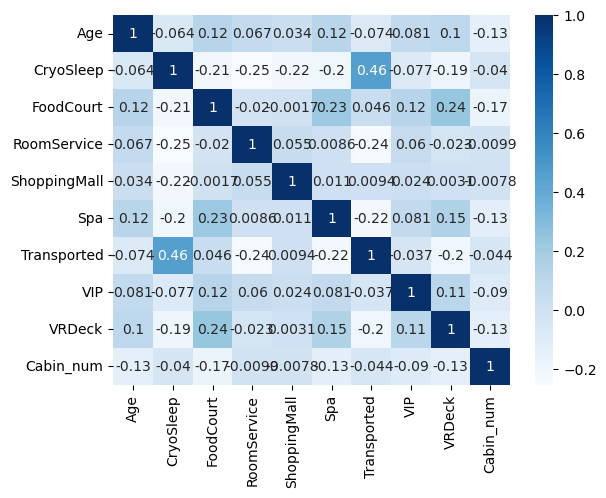

In [30]:
sns.heatmap(data_numeric.corr(), annot=True, cmap='Blues')

#### Com o heatmap acima, percebemos que alguns frames possui correlação insignificante, com isso vamos excluir do dataframe

In [31]:
#data.drop(['ShoppingMall'], axis=1, inplace=True)
#data.drop(['FoodCourt'], axis=1, inplace=True)
#data.drop(['Age'], axis=1, inplace=True)

In [32]:
from scipy.stats import chi2_contingency

# Definir uma função para calcular a correlação de Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calcular as correlações entre todas as colunas e 'Transported'
correlacoes_transported = {}
for column in data.columns:
    correlation = cramers_v(data[column], data['Transported'])
    correlacoes_transported[column] = correlation

# Exibir as correlações
correlacoes_transported


{'Age': 0.14388087591233448,
 'CryoSleep': 0.45979242141732846,
 'Destination': 0.10915456897855035,
 'FoodCourt': 0.2595092667059137,
 'HomePlanet': 0.19095221947165825,
 'RoomService': 0.2765619863139802,
 'ShoppingMall': 0.274524251473747,
 'Spa': 0.2712939761933015,
 'Transported': 0.9997698912675346,
 'VIP': 0.03488168932550548,
 'VRDeck': 0.245600910433057,
 'Deck': 0.21299123959064675,
 'Cabin_num': 0.14354215211978377,
 'Side': 0.10297555868949634}

In [33]:
#data.drop(['VIP'], axis=1, inplace=True)

In [34]:
data = pd.get_dummies(data, columns=['Destination', 
                                     'CryoSleep', 
                                     'HomePlanet',
                                     'Side',
                                     'Deck'], dtype=int) #drop_first=True

In [35]:
data

,Age,FoodCourt,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Cabin_num,Destination_55 Cancri e,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,1,0,0,1,0,0,0,0,0,0
0002_01,24.0,9.0,109.0,25.0,549.0,1.0,0,44.0,0,0,...,0,1,0,0,0,0,0,1,0,0
0003_01,58.0,3576.0,43.0,0.0,6715.0,0.0,1,49.0,0,0,...,0,1,1,0,0,0,0,0,0,0
0003_02,33.0,1283.0,0.0,371.0,3329.0,0.0,0,193.0,0,0,...,0,1,1,0,0,0,0,0,0,0
0004_01,16.0,70.0,303.0,151.0,565.0,1.0,0,2.0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,0.0,0.0,0.0,0.0,NaN,0,0.0,1496,0,...,0,1,0,0,0,0,0,0,1,0
9269_01,42.0,847.0,0.0,17.0,10.0,NaN,0,144.0,82,0,...,0,0,0,0,0,0,0,0,0,0
9271_01,29.0,0.0,0.0,0.0,0.0,NaN,0,0.0,296,1,...,1,0,0,0,0,1,0,0,0,0


## Atualizar train_data e test_data

### Primeiro com o train_data

In [36]:
train_data.shape

(8693, 13)

In [37]:
train = data.loc[train_data.index]

In [38]:
train.shape

(8693, 27)

In [39]:
train.isnull().sum()

Age                          0
FoodCourt                    0
RoomService                  0
ShoppingMall                 0
Spa                          0
Transported                  0
VIP                          0
VRDeck                       0
Cabin_num                    0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
CryoSleep_0                  0
CryoSleep_1                  0
HomePlanet_Earth             0
HomePlanet_Europa            0
HomePlanet_Mars              0
Side_P                       0
Side_S                       0
Deck_A                       0
Deck_B                       0
Deck_C                       0
Deck_D                       0
Deck_E                       0
Deck_F                       0
Deck_G                       0
Deck_T                       0
dtype: int64

### Agora com o test_data

In [40]:
test_data.shape

(4277, 12)

In [41]:
test = data.loc[test_data.index]

In [42]:
test.shape

(4277, 27)

In [43]:
test.isnull().sum()

Age                             0
FoodCourt                       0
RoomService                     0
ShoppingMall                    0
Spa                             0
Transported                  4277
VIP                             0
VRDeck                          0
Cabin_num                       0
Destination_55 Cancri e         0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
CryoSleep_0                     0
CryoSleep_1                     0
HomePlanet_Earth                0
HomePlanet_Europa               0
HomePlanet_Mars                 0
Side_P                          0
Side_S                          0
Deck_A                          0
Deck_B                          0
Deck_C                          0
Deck_D                          0
Deck_E                          0
Deck_F                          0
Deck_G                          0
Deck_T                          0
dtype: int64

## Setar X e Y para o treino

In [44]:
X = train.drop('Transported', axis=1)

In [45]:
y = train['Transported']

In [46]:
train

,Age,FoodCourt,RoomService,ShoppingMall,Spa,Transported,VIP,VRDeck,Cabin_num,Destination_55 Cancri e,...,Side_P,Side_S,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
0001_01,39.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,...,1,0,0,1,0,0,0,0,0,0
0002_01,24.0,9.0,109.0,25.0,549.0,1.0,0,44.0,0,0,...,0,1,0,0,0,0,0,1,0,0
0003_01,58.0,3576.0,43.0,0.0,6715.0,0.0,1,49.0,0,0,...,0,1,1,0,0,0,0,0,0,0
0003_02,33.0,1283.0,0.0,371.0,3329.0,0.0,0,193.0,0,0,...,0,1,1,0,0,0,0,0,0,0
0004_01,16.0,70.0,303.0,151.0,565.0,1.0,0,2.0,1,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9276_01,41.0,6819.0,0.0,0.0,1643.0,0.0,1,74.0,98,1,...,1,0,1,0,0,0,0,0,0,0
9278_01,18.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1499,0,...,0,1,0,0,0,0,0,0,1,0
9279_01,26.0,0.0,0.0,1872.0,1.0,1.0,0,0.0,1500,0,...,0,1,0,0,0,0,0,0,1,0


## Escolher Colunas para Treino

In [47]:
X.columns

Index(['Age', 'FoodCourt', 'RoomService', 'ShoppingMall', 'Spa', 'VIP',
       'VRDeck', 'Cabin_num', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep_0',
       'CryoSleep_1', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Side_P', 'Side_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'],
      dtype='object')

In [48]:
# Não irei utilizar o 'Group' para treino pq nao tem muita correlação
columns = ['Age', 'RoomService', 'Spa',
       'VRDeck', 'Cabin_num', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep_0',
       'CryoSleep_1', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Side_P', 'Side_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T']

In [49]:
X = X[columns]

## Aplicando o Treino

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21)

In [88]:
X_train.shape, y_train.shape

((6519, 23), (6519,))

In [89]:
X_test.shape, y_test.shape

((2174, 23), (2174,))

In [101]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [102]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [103]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=1, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [104]:
modelos = [{'nome': 'XGBoost',
            'modelo': XGBClassifier},
           {'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [105]:
resultados = []

for model_info in modelos:
    x = ModeloAuxiliar(clf=model_info['modelo'])
    
    # Treinar o modelo
    x.fit(X_train, y_train)
    
    # Verificar os dados de teste e convertê-los se necessário
    if not isinstance(X_test, np.ndarray):
        X_test = np.array(X_test)
    
    # Verificar a consistência dos dados
    if X_test.shape[1] != X_train.shape[1]:
        print("Erro: O número de features nos dados de teste não é o mesmo que nos dados de treinamento.")
        continue
    
    # Fazer previsões
    x_pred = x.predict(X_test)
    
    # Calcular a acurácia
    acuracidade = x.score(X_test, y_test)
    
    resultados.append({
        'nome': model_info.get('nome', str(model_info['modelo'])),
        'score': acuracidade,
        'pred': x_pred
    })

In [106]:
resultados

[{'nome': 'XGBoost',
  'score': 0.7948482060717571,
  'pred': array([1, 1, 0, ..., 1, 1, 0])},
 {'nome': 'logreg',
  'score': 0.7824287028518859,
  'pred': array([1., 1., 0., ..., 1., 1., 0.])},
 {'nome': 'etree',
  'score': 0.7888684452621895,
  'pred': array([0., 1., 0., ..., 1., 0., 0.])},
 {'nome': 'gradboost',
  'score': 0.8017479300827967,
  'pred': array([1., 1., 0., ..., 1., 1., 0.])},
 {'nome': 'adaboost',
  'score': 0.7911683532658693,
  'pred': array([1., 1., 0., ..., 1., 0., 1.])},
 {'nome': 'SVC',
  'score': 0.7759889604415824,
  'pred': array([1., 1., 1., ..., 1., 1., 0.])},
 {'nome': 'KNN',
  'score': 0.749770009199632,
  'pred': array([1., 1., 0., ..., 1., 1., 0.])},
 {'nome': 'GaussianNB',
  'score': 0.7474701011959521,
  'pred': array([1., 1., 1., ..., 1., 1., 0.])},
 {'nome': 'Perceptron',
  'score': 0.6623735050597976,
  'pred': array([1., 0., 1., ..., 1., 0., 0.])},
 {'nome': 'LinearSVC',
  'score': 0.6674333026678932,
  'pred': array([1., 1., 0., ..., 1., 0., 0.])

In [107]:
models = pd.DataFrame(resultados)

In [108]:
models[['nome', 'score']].sort_values(by='score', ascending=False)

,nome,score
3,gradboost,0.801748
12,RForest,0.801748
0,XGBoost,0.794848
4,adaboost,0.791168
2,etree,0.788868
1,logreg,0.782429
5,SVC,0.775989
6,KNN,0.749770
7,GaussianNB,0.747470
11,Dtree,0.739190


In [113]:
resultados[-1]['nome']['score']

TypeError: string indices must be integers, not 'str'

<Axes: xlabel='Transported'>

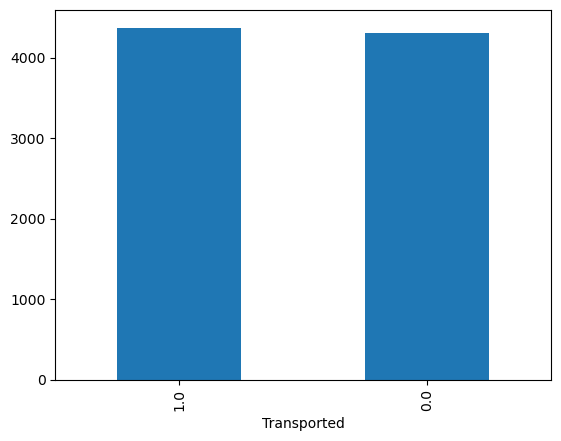

In [86]:
plot_df = data.Transported.value_counts()
plot_df.plot(kind="bar")

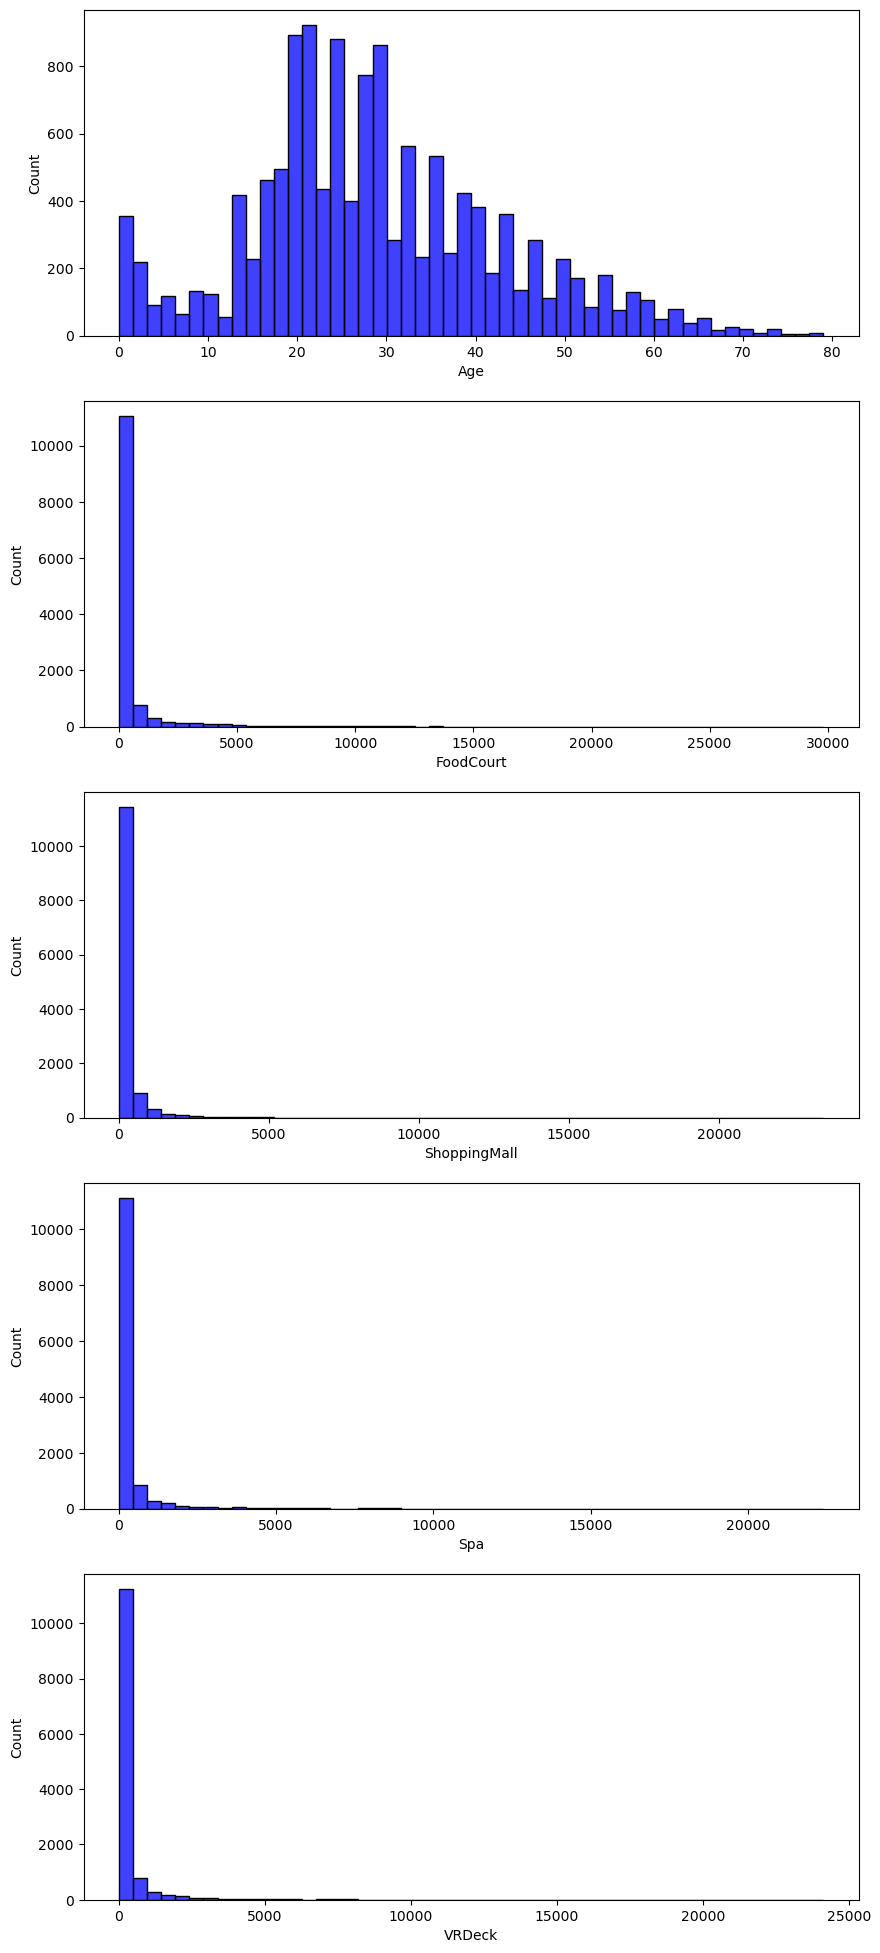

In [62]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(data['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(data['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(data['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(data['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(data['VRDeck'], color='b', bins=50, ax=ax[4]);